In [47]:
import pandas as pd
import os
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np

In [4]:
files = os.listdir("Data")
files

['Intersquad1.csv', 'Intersquad2.csv', 'Intersquad3.csv']

In [22]:
data = pd.read_csv("Data/"+files[0])
data = data.assign(Period = 1)
for file in files:
    df = pd.read_csv("Data/"+file)
    df = df.assign(Period = int(file[-5]))
    data = pd.merge(data,df,how="outer")
data.groupby(["Event","Player","Result"]).count()

Game  Start Pos  End Pos  Period
Event    Player Result                                        
Pass     Blue   Successful       8          8        8       8
                Unsuccessful     9          9        9       9
         Grey   Successful       6          6        6       6
                Unsuccessful     6          6        6       6
Throw-in Blue   Successful      15         15       15      15
                Unsuccessful     1          1        1       1
         Grey   Successful      14         14       14      14
                Unsuccessful     5          5        5       5

In [49]:
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
data

,Game,Event,Result,Start Pos,End Pos,Player,Period,startX,startY,endX,endY
0,intersquad,Pass,Successful,"[13.809523809523796, 65.14285714285714]","[3.714285714285701, 59.61904761904762]",Blue,3,13.809524,65.142857,3.714286,59.619048
1,intersquad,Pass,Successful,"[16.666666666666657, 67.42857142857143]","[5.428571428571416, 59.61904761904762]",Blue,1,16.666667,67.428571,5.428571,59.619048
2,intersquad,Pass,Successful,"[17.999999999999986, 67.04761904761905]","[7.523809523809511, 58.666666666666664]",Blue,1,18.000000,67.047619,7.523810,58.666667
3,intersquad,Pass,Successful,"[21.999999999999986, 11.047619047619051]","[9.238095238095227, 28.95238095238095]",Grey,2,22.000000,11.047619,9.238095,28.952381
4,intersquad,Pass,Successful,"[23.52380952380951, 56.0]","[6.571428571428562, 36.0]",Blue,1,23.523810,56.000000,6.571429,36.000000
...,...,...,...,...,...,...,...,...,...,...,...
59,intersquad,Throw-in,Unsuccessful,"[14.952380952380942, 79.80952380952381]","[39.33333333333332, 72.76190476190476]",Grey,1,14.952381,79.809524,39.333333,72.761905
60,intersquad,Throw-in,Unsuccessful,"[24.857142857142847, 79.80952380952381]","[47.14285714285713, 67.61904761904762]",Grey,1,24.857143,79.809524,47.142857,67.619048
61,intersquad,Throw-in,Unsuccessful,"[42.19047619047618, 0.1904761904761898]","[71.7142857142857, 5.523809523809533]",Grey,1,42.190476,0.190476,71.714286,5.523810
62,intersquad,Throw-in,Unsuccessful,"[69.04761904761904, 0.0]","[88.09523809523807, 9.523809523809533]",Grey,1,69.047619,0.000000,88.095238,9.523810


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


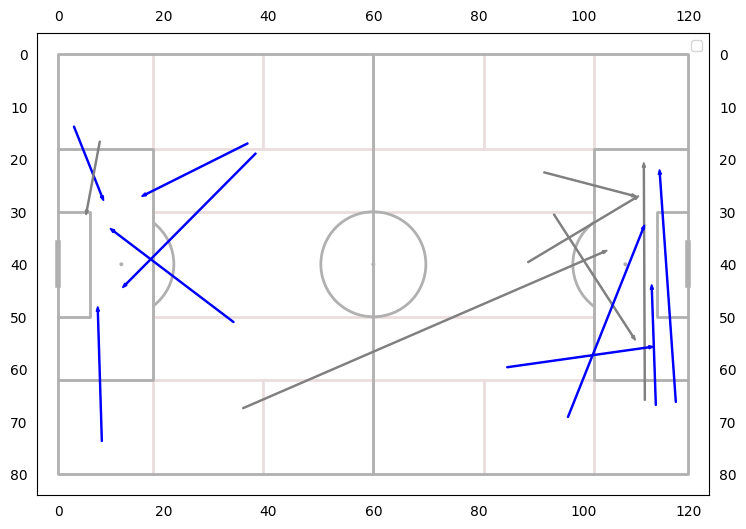

In [58]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
passes = data[(data.get("Event") == "Pass") & (data.get("Result") == "Unsuccessful")]
for i in range(passes.shape[0]):
    row = passes.iloc[i]
    team = row.get("Player")
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,color = team)# ,end_pos[0]-start_pos[0],end_pos[1]-start_pos[1],
plt.legend()
plt.show()